$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 11} $$

$$ \text{Basic concepts in statistics and probability:}  $$

$$ \text{Mean, Variance, Correlation and Histograms}  $$

$$ \text{ By: Güray GÜRKAN, PhD} $$

$$ Aug\ 2016 $$

# Basic Formulas Revisited

* Sum of samples of $x(n)$:

$$ \sum_{n=0}^{M-1}x(n) $$

* Sum of samples of $x(n)$ divided by number of samples: 

$$ \frac{1}{M} \sum_{n=0}^{M-1}x(n) = \text{This is the mean!}$$

* Sum of squares of $x(n)$ samples: 

$$ \sum_{n=0}^{M-1}x^2(n) $$

* Sum of squares of zero-meaned $x(n)$ samples divided by number of samples:

$$ \frac{1}{M}\sum_{n=0}^{M-1}\left( x(n) - \mu_x \right)^2 = \text{This is variance!}$$

## Questions:

- What is the summation of samples of a sinusoidal signal for multiple intervals of its period?


- What is the first coefficient ($k=0$) of FFT vector?


#Python commands

* **Mean ($\mu$):**
        1) sum(x) /len(x) ... (float division)
        2) mean(x)        ... (from numpy module)
    
* **Variance ($\sigma^2$):**
        1) sum(power(x- mean(x),2)) /len(x) 
        2) var(x)      

**Example **

** *Review:* ** 

We will now generate and plot a sinusoidal signal with:
- Frequency: 5 Hz
- Peak value: 2 (i.e.Volts)
- Duration: 5s (fs = 100 Hz)


Populating the interactive namespace from numpy and matplotlib


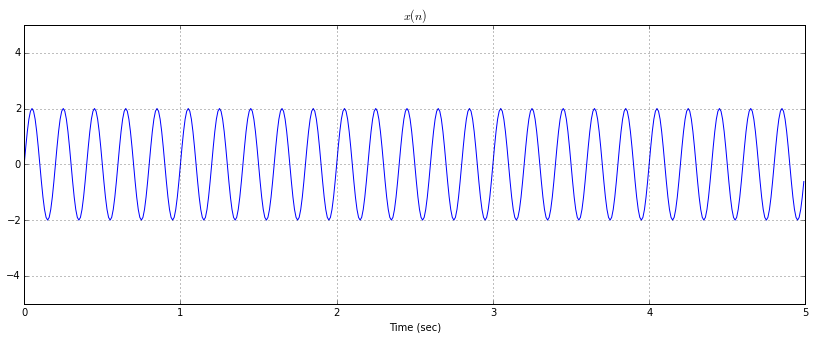

In [29]:
%pylab inline
from IPython.display import Image
from IPython.display import Audio


rcParams['figure.figsize']=(14,5)
fs = 100.0
t = arange(5*fs)/fs ## 500 samples.
x = 2*sin(2*pi*5*t)

plot(t,x)
grid(True)
ylim([-5, 5])
xlabel('Time (sec)')
title('$x(n)$')

- The average value of $x(n)$ is zero. (The signal waves across $y=0$ line )

- Now we will add the plot $ x^2(n)$:

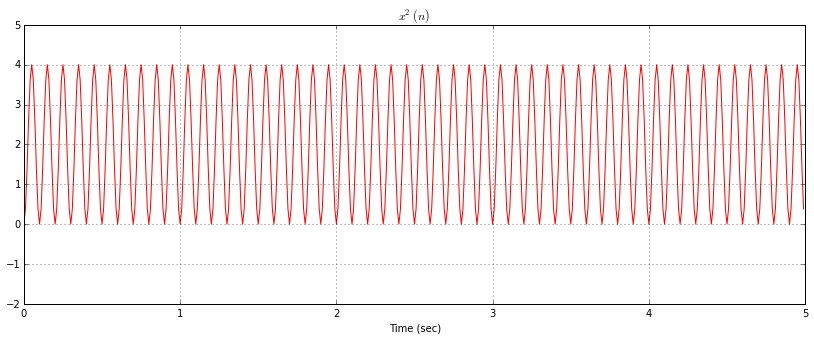

In [30]:
rcParams['figure.figsize']=(14,5)
plot(t,x*x,'r')
grid(True)
ylim([-2, 5])
xlabel('Time (sec)')
title('$x^2(n)$')

Can you tell the average value of $x^2(n)$ ?

The _average_ value of $x^2(n)$ is 2.

The find this value, we have to write:

$$ \frac{1}{M}\sum x^2(n) = 2$$

However, since $\mu_x = \sum x(n) /M =0$, we can also write 

$$ \frac{1}{M}\sum \left(x(n)-\mu_x\right)^2 = 2 $$

Here, the term $\frac{1}{M} \sum \left(x(n)-\mu_x\right)^2$ is the variance of $x(n)$. That is

$$ \sigma_x ^2 = 2 $$

In [31]:
print "Mean value of x(n) is ", mean(x)
print "  Variance of x(n) is ", var(x)

Mean value of x(n) is  -2.84217094304e-17
  Variance of x(n) is  2.0


** Variance vs. standard deviation: **

The standard deviation, denoted as $ \sigma $, is simply the square root of the variance.

That can also be calculated via direct function (of numpy module) as

        std_x = std(x)

 #Generation of populations from a specific distribution

- Python is able to generate variables of a specific distribution
- Most important ones are rand() and randn() functions (from *numpy.random* module)
- What is the difference?


** Emprical Decision of rand() and randn() differences **

1) Generate two arrays with 1000 samples, one generated by rand() and the other by randn().

2) Plot the waveforms.

Can you now tell the difference?


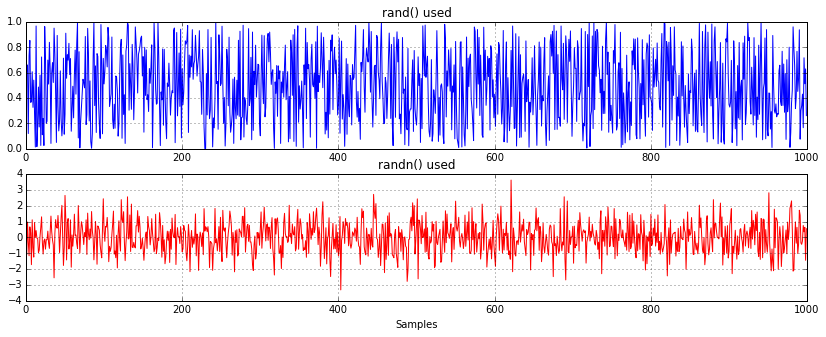

In [32]:
from numpy.random import *

pop1 = rand(1000)
pop2 = randn(1000)

subplot(2,1,1);plot(pop1);
title('rand() used')
grid(True)
subplot(2,1,2);plot(pop2,'r')
grid(True);title('randn() used')
xlabel('Samples')

** *Observations* **

- The blue waveform takes values only between 0 and 1.
- The red waveform takes values out of 0 and 1 but has symmetry across $y=0$ line.

** * Function definitions: * **

- **rand()** : Generates standard uniform distribution of numbers netween 0 and 1. 
- **randn()**: Generates a standard normal (Gaussian) distribution with zero mean ($\mu = 0$) and unit variance ($\sigma^2 =1 $). 
        

###  Uniform distribution with a specific mean

How can we generate a 10000 element vector from a uniform distribution between [1 to 4] ?

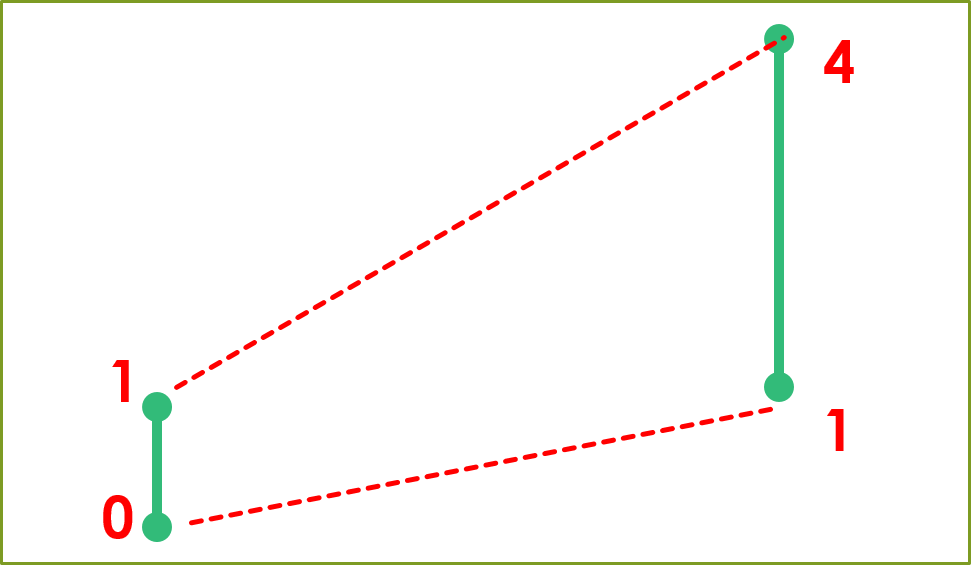

In [33]:
Image('.\Figs\EE0404_Lecture11_fig1.png',width=400)

** Solution: **
Without any additional parameters, the command * rand() * generates uniform distribution with limits 0 and 1. In this state, the mean is the (arithmetic) average of the limits, which is 0.5. Direct (linear) scaling of generated numbers will also scale the distribution limits. That is, for $x(n)$ being the generated time series with *rand()*, the new time series 

$$ y(n) = A x(n) $$

will have the limits of 0 and $A$.

Similarly, any scalar number added to $x(n)$ will be added directly to these limits. To generalize;

$$ y(n) = Ax(n) +b $$

will have the limits $b$ and $A+b$. It is interesting that

$$ \mu_y = \frac{(A+b) - b}{2} +b = \frac{A}{2} +b $$


Thus, for the problem given, we have $b=1$ and 

$$ A+b = 4 \to A=3$$

and

$$ \mu_y = \frac{3}{2}+1 = 2.5$$

#### Codes


Mean of x(n) =  0.50391331482
Mean of y(n) =  2.51173994446


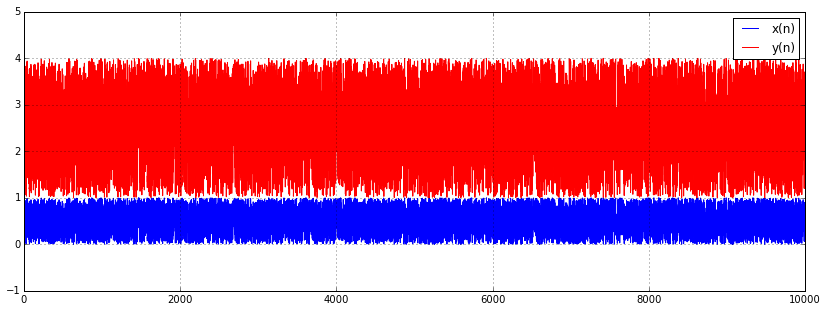

In [34]:
x = rand(10000)

y = 3*x + 1.0

plot(x);hold(True);plot(y,'r');grid(True);
ylim([-1,5]);legend(('x(n)','y(n)'))

print "Mean of x(n) = ", mean(x)
print "Mean of y(n) = ", mean(y)

### Normal distribution with a specific mean and variance

For the normal distribution genereted via *randn()* command, mean is always 0. However, the addition of a scalar is directly added to the mean value of the distribution. In addition, multiplication of distribution elements by a scalar doesn't affect the mean, however it directly scales the variance of the distribution.

Let x(n) be a normal distribution with mean $\mu_x=0 $ and variance $ \sigma ^2_x $, denoted as ($0 ,\sigma^2_x$). Then

$$ y(n)  = Cx(n) +d $$

is also a normal distribution. 

The **mean** of the new series is

$$ \mu_y =\frac{1}{M} \sum y(n) =\frac{1}{M} \sum_M \left(Cx(n)+d \right))=\frac{1}{M} C\sum_M x(n) + \frac{1}{M} \sum_M d   $$

Since $\sum x(n)=0$, we have

$$ \mu_y = d $$

Similarly, the **variance** of the new series is

$$ \sigma_y^2 = \frac{1}{M}\sum \left( y(n) - \mu_y  \right)^2 = \frac{1}{M}\sum  C^2 x^2(n) $$ 

we know that since $\mu_x=0$, 

$$ \sigma_x^2 = \frac{1}{M}\sum x^2(n) $$

we have

$$ \sigma_y^2 = C^2 \sigma_x^2 $$

As a result, the new series' variance is the $C^2$ scaled of source series. In addition as a simpler relation, the normal distribution can be linearly scaled in terms of standard deviation.

#### Example
We will now generate two 10000 element vectors from a normal distribution with
    
    1) mean 1.5 and variance 0.2
    2) mean 6 and variance 3

** Solution **

By denoting the normal distribution (0,1) by $x(n)$, we can write

$$ y_1(n) =\sqrt{0.2} x(n) + 1.5 $$

and

$$ y_2(n) =\sqrt{3} x(n) + 6 $$

** Coding **

In [35]:
x = randn(10000);

y1 = sqrt(.2)*x +1.5
y2 = sqrt(3)*x + 6

print "y1 -> MEAN: ", mean(y1), ", VAR: ", var(y1)
print "y2 -> MEAN: ", mean(y2), ", VAR: ", var(y2)

y1 -> MEAN:  1.50091833938 , VAR:  0.201389978793
y2 -> MEAN:  6.00355671313 , VAR:  3.0208496819


To better see the distribution parameters, let's calculate and plot the histograms.

In [36]:
distx,binsx = histogram(x,bins=100)
disty1,binsy1 = histogram(y1,bins=100)
disty2,binsy2 = histogram(y2,bins=100)

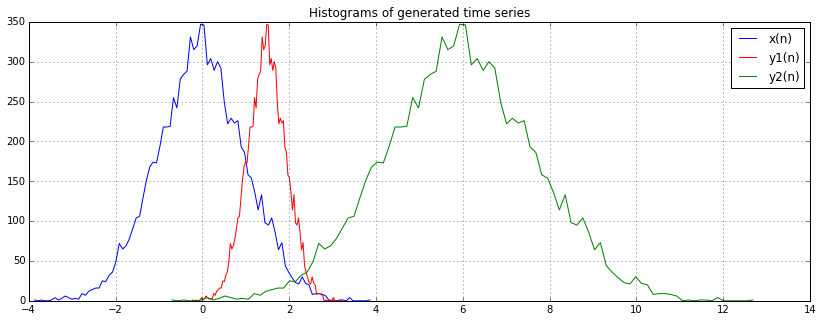

In [37]:
plot(binsx[:-1],distx)
grid(True),hold(True)
plot(binsy1[:-1],disty1,'r')
plot(binsy2[:-1],disty2,'g')
legend(('x(n)','y1(n)','y2(n)'))
title('Histograms of generated time series')

# Auto and Cross correleations

To describe the correleation functions,

* Shifted versions (different lags) of a signal is multiplied by itself in **auto-correlation**

* Shifted versions of a signal is multiplied by another signal in ** cross-correlation** calculations.

##Auto-correlation

In maths, the autocorrelation(function) of finite length $x(n)$, denoted by $r(k)$ is defined as

$$ r(k) = \sum_{k=- (M-1)}^{M-1}  x(n) x^*(n+k) $$

where $*$ doesn't makes sense unless x(n) is complex valued. Here

* $M$ is the number of samples of $x(n)$
* k is the lag (in samples).

For every lag, there exists a numerical value. For k=0, the numerical value equals to $\sum x^2(n) $ which is the variance*M for zero-mean $x(n)$.







(-10, 210)

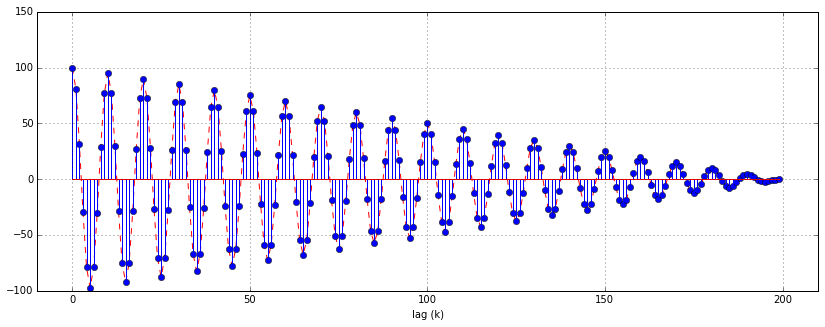

In [38]:
# Iterative calculation of autocorrelation

fs = 100.0
t = arange(2*fs)/fs
x = sin(2*pi*10*t) # 10 Hz, sampled at 100 Hz. 200 samples generated.
M = len(x)

r = repeat(0.0,M)
for k in range(M):
    p = hstack((x[k:],zeros(k)))
    r[k] = sum(x*p)
    
plot(range(M),r,'--r')
hold(True)
stem(range(M),r)
grid(True)
xlabel('lag (k)')
xlim([-10,210])

This is a single sided autocorrelation function since negative values of k is not used. To calculate autocorrelation we can use *correlate()* function (from *scipy.signal* module).

        r = correlate(x,x)


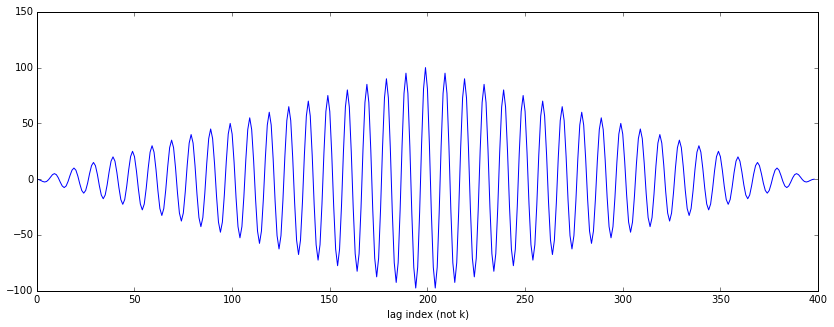

In [39]:
from scipy.signal import *
r_ = correlate(x,x)

plot(r_)
xlabel('lag index (not k)')

We have to make a correction on x-label since the x-axis indeed is the lag index, not lags (k).

We have
- $M-1 $ lags to the right,
- $M-1$ lags to the left and
- k=0 (full overlap, no shift)
Thus, we have 

$$ 2(M-1) +1 = 2M-1$$
lags. For the example code we have generated $ M= 200 $ samples. So we have 399 lags where

$$ -199 \le k \le 199 $$

Thus, we only have to add the line
        * k = arange(-(M-1),M)

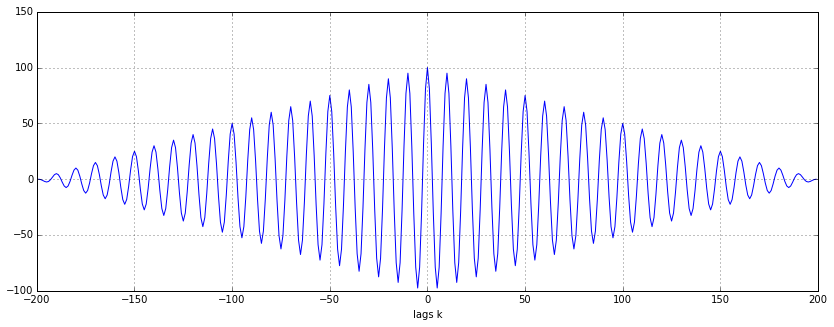

In [40]:
k = arange(-(M-1),M)
plot(k,r_)
xlabel('lags k')
grid(True)

As you may notice, since $x(n)$ is periodic, its autocorrelation is also periodic. Since $x(n)$ has finite length, the autocorrelation values converges zero as lag parameter increases in norm. By zoooming to the autocorrelation:

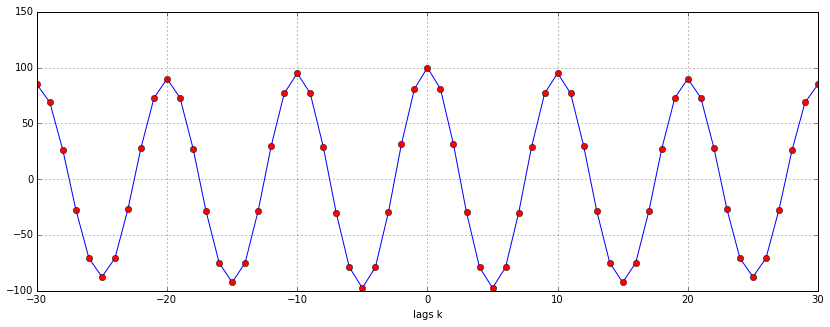

In [41]:
plot(k,r_); hold(True); plot(k,r_,'or'); xlabel('lags k'); grid(True); xlim([-30, 30]);

we can see that:

* $r(0) = 100 \to $ This can be verified by calculating $ \sum x^2(n) $.

In [42]:
print "The result is ", sum(x*x)

The result is  100.0


* The period of $r(k)$ is 10 lags. This is also the period of $x(n)$ in samples.
    * $$ f_N = \frac{f_r }{f_s} \to f_N = \frac{10}{100} = 0.1 \to T = \frac{1}{f_N} = 10 \text{ samples}$$

## Effect of scalar addition on Autocorrelation

Now we will generate a second signal named $x_{DC}(n)$ which is obtained by adding 4 to the original signal $x(n)$

$$ x_{DC}(n) = x(n) + 4 $$

Let's make a common plot of autocorrelations:

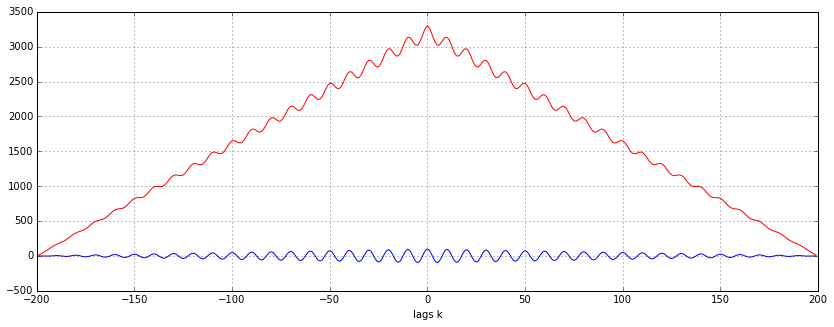

In [43]:
xDC = x + 4;
r_dc = correlate(xDC,xDC);
plot(k,r_)
xlabel('lags k')
hold(True)
plot(k,r_dc,'r')
grid(True)

If we plot the difference of $r_x$ and $r_{x_{DC}} $ 

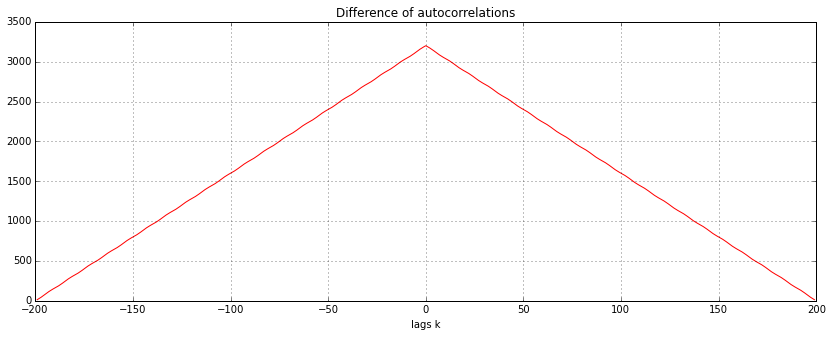

In [44]:
plot(k,r_dc - r_,'r'); grid(True); xlabel('lags k'); title('Difference of autocorrelations')

This function is indeed the autocorreletion  of $dc(n)=4u(n)$ for M=200 points.

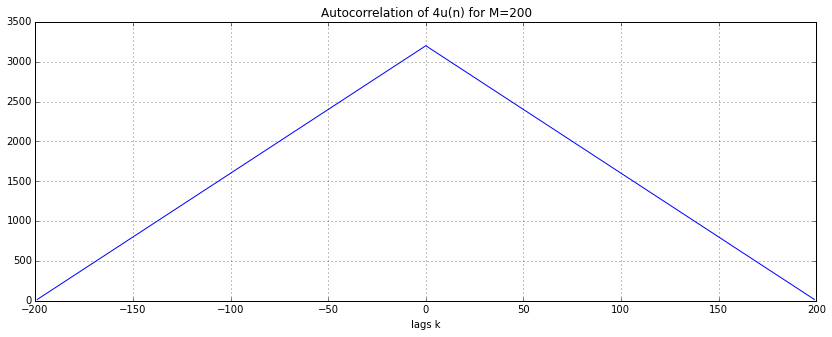

In [45]:
dc = repeat(4.0,200)
r_dc = correlate(dc,dc)
plot(k,r_dc); grid(True); xlabel('lags k')
title('Autocorrelation of 4u(n) for M=200')

and $r_{dc}(0)$ should have the value

$$ r_{dc}(0) = \sum_{n=0}^{n=199} 4^2u^2(n) =16 \times 200=3200 $$

As result, we can write

$$ r_{x_{DC}}(k) = r_x(k) + r_{dc}(k) $$

# Effect of additive Gaussian white noise on Autocorrelation

** White noise **

White noise, in simplest form, can be generated via normal distributions. The white noise signal in ideal form has an unlimited bandwidth.

In [48]:
# White noise generation:
fs = 44100.0
w = randn(2*fs)

Audio(data=w, rate=fs)

Now let's again use our original signal $x(n)$ and generate a noisy signal by

$$ x_{noisy}(n) = x(n) + w(n) $$

where $w(n)$ is generated from a normal distribution with ($\mu=0, \sigma^2 = 2$)  

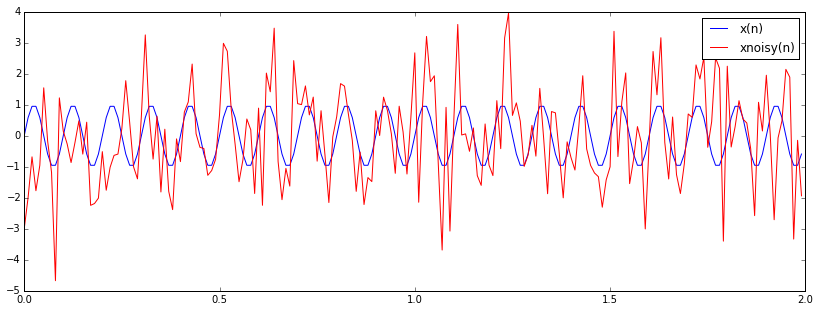

In [64]:
# Codes
w = sqrt(2)*randn(len(x));
xn = x + w;
plot(t,x); hold(True); plot(t,xn,'r'); legend(('x(n)','xnoisy(n)'))

Now let's check, how the autocorrelation is affected...

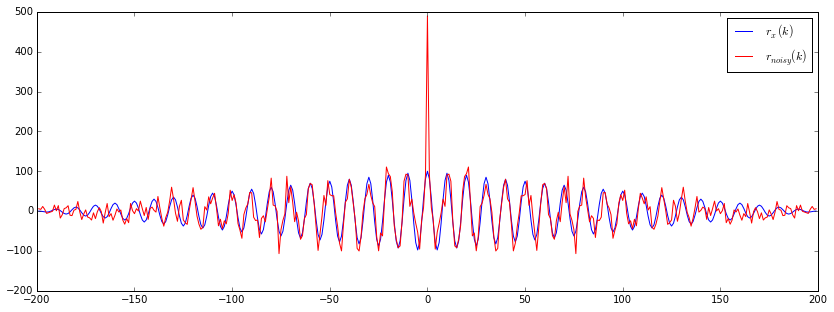

In [65]:
r_noisy = correlate(xn,xn)

plot(k,r_);hold(True); plot(k,r_noisy,'r'); legend(('$r_x(k)$','$r_{noisy}(k)$'))

and the autocorrelation of noise component is

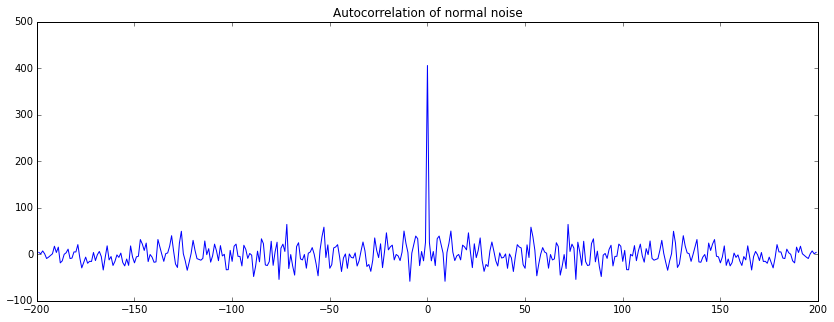

In [66]:
r_noise = correlate(w,w)
plot(k,r_noise);title('Autocorrelation of normal noise')

This plot almost agrees with the theroetical result:
    $$ r_{noise}(k) = M\sigma^2 \delta (k) $$ 
    
since 

$$ r_{noise}(0) = 200 \times 2 = 400 $$

The periodicity of the noisy signal is not so clear from waveform, however, the autocorrelation is not affected from additive noise. This important property is used in adaptive filters to eliminate uncorrelated noise sources.